# Colocalization Test

**Created**: 30 November 2021

## Environment

In [2]:
rm(list=ls())

library(tidyverse)
library(data.table)
library(RColorBrewer)
library(cowplot)
library(coloc)
library(susieR)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


This is a new update to coloc.



## Load Data

In [3]:
chr.10 <- readRDS("~/gains_team282/nikhil/colocalization/cis_eqtl/cis.eqtl.loci.chr10.RDS")

In [4]:
eqtl.sdY <- readRDS("~/gains_team282/nikhil/colocalization/cis_eqtl/cis.eqtl.sdY.RDS")

In [36]:
me.5 <- fread("~/gains_team282/nikhil/expression/eigengene_sva/initial_pass/ME_5.tsv")
colnames(me.5) <- c("snp", "beta", "se", "t", "p")
rownames(me.5) <- me.5$snp

In [47]:
eigengenes <- read.csv("~/gains_team282/nikhil/expression/gene_expression/eigengenes.csv")

In [27]:
snps <- as.matrix(me.5[p < 1e-8, "snp"])[,1]
which(sapply(chr.10, function(x) length(intersect(x$snp, snps)) > 0))

ENSG00000026103 ENSG00000107796 ENSG00000107798 ENSG00000119917 ENSG00000119922 
              8             102             103             150             151 
ENSG00000138134 ENSG00000138138 ENSG00000138182 ENSG00000152766 ENSG00000152778 
            212             213             220             304             305 
ENSG00000152782 ENSG00000171862 ENSG00000180139 ENSG00000184719 ENSG00000185745 
            306             415             442             458             464 
ENSG00000204010 ENSG00000204020 ENSG00000213613 ENSG00000223820 ENSG00000224745 
            524             525             541             559             564 
ENSG00000227268 ENSG00000227905 ENSG00000286116 
            589             595             752

## Test Colocalization at Locus

When I used standard `COLOC` without SuSiE, the best colocalization was at the *ITIH4* locus (ENSG00000055955). I will check for colocalization here using the LD matrix and SuSiE.

In [257]:
eqtl.test <- "ENSG00000286116"

In [258]:
eqtl.locus <- chr.10[[eqtl.test]]

In [259]:
str(eqtl.locus)

List of 7
 $ snp     : chr [1:3003] "rs11202613" "rs1008435" "rs2311738" "rs141392864" ...
 $ position: int [1:3003] 87994668 87994688 87994983 87995074 87995184 87995318 87995332 87995844 87995845 87995886 ...
 $ beta    : num [1:3003] -0.010793 0.000185 -0.007886 0.010795 0.000185 ...
 $ varbeta : num [1:3003] 0.00057 0.000259 0.00017 0.00116 0.000259 ...
 $ type    : chr "quant"
 $ sdY     : num 0.273
 $ LD      : num [1:3003, 1:3003] 1 0.016 0.18903 0.00643 0.016 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3003] "rs11202613" "rs1008435" "rs2311738" "rs141392864" ...
  .. ..$ : chr [1:3003] "rs11202613" "rs1008435" "rs2311738" "rs141392864" ...


In [260]:
mqtl.locus <- chr.10[[eqtl.test]]

In [261]:
mqtl.info <- as.data.frame(me.5[snp %in% mqtl.locus$snp,])
rownames(mqtl.info) <- mqtl.info$snp
mqtl.locus$beta = mqtl.info[mqtl.locus$snp, "beta"]
mqtl.locus$varbeta = mqtl.info[mqtl.locus$snp, "se"]^2
mqtl.locus$sdY = sd(eigengenes$ME_5)

In [262]:
eqtl.S = runsusie(eqtl.locus)

running max iterations: 100

Warning message in susie_suff_stat(XtX = R, Xty = z, n = 2, yty = 1, L = L, scaled_prior_variance = prior_variance, :
“IBSS algorithm did not converge in 100 iterations!”
	converged: FALSE

running max iterations: 10000

	converged: TRUE



In [263]:
mqtl.S = runsusie(mqtl.locus)

running max iterations: 100

	converged: TRUE



In [264]:
susie.res = coloc.susie(eqtl.S, mqtl.S)

Using 3003/ 3003 and 3003 available



PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.35e-91  2.48e-05  2.96e-86  1.00e+00  3.41e-07 
[1] "PP abf for shared variant: 3.41e-05%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  2.48e-05  0.00e+00  1.00e+00  2.56e-07 
[1] "PP abf for shared variant: 2.56e-05%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  2.48e-05  0.00e+00  1.00e+00  2.25e-07 
[1] "PP abf for shared variant: 2.25e-05%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
3.70e-120  2.48e-05 1.49e-115  1.00e+00  2.63e-07 
[1] "PP abf for shared variant: 2.63e-05%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  2.48e-05  0.00e+00  1.00e+00  2.29e-07 
[1] "PP abf for shared variant: 2.29e-05%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.43e-85  2.48e-05  5.78e-81  1.00e+00  4.63e-07 
[1] "PP abf for shared variant: 4.63e-05%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  2.48e-05  0.00e+00  1.00e+00  1.05e-06 
[1] "PP abf for shared varia

Results fail decision rule H4 > 0.7



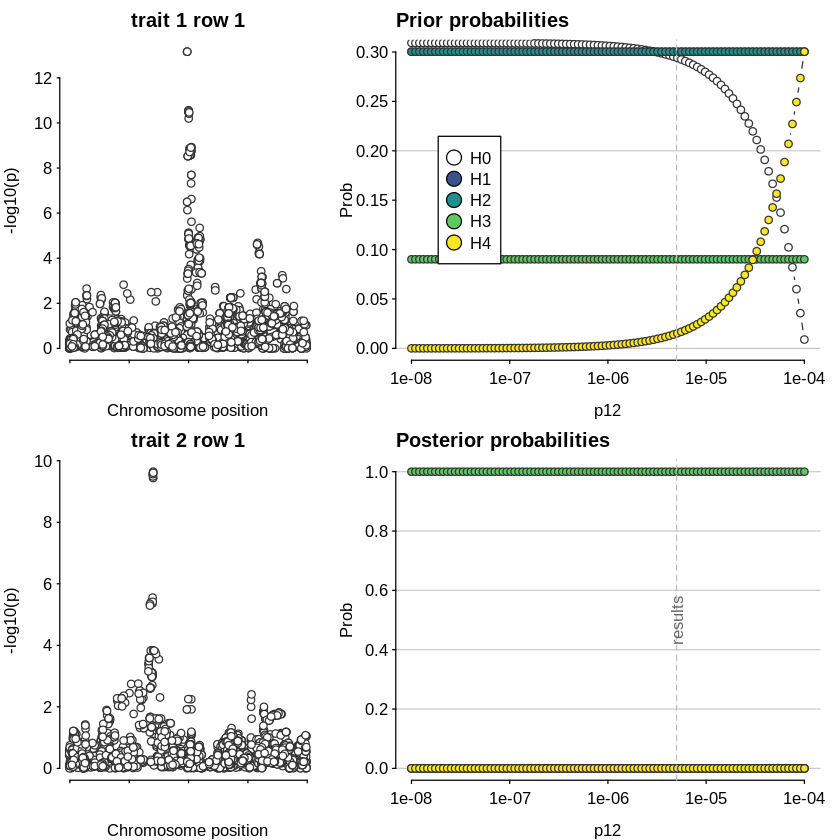

In [265]:
sensitivity(susie.res, dataset1=eqtl.locus, dataset2=mqtl.locus, "H4 > 0.7")